In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

In [2]:
#acc = gpd.read_file('https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.geojson')

In [3]:
acc = gpd.read_file('data/Collisions.geojson')

In [10]:
timeline=acc['INCDATE']

In [6]:
inc_datetimes=acc['INCDTTM']
inc_datetimes[0]

'8/15/2018 8:00:00 PM'

In [7]:
from dateutil import parser

In [8]:
dts = pd.Series([parser.parse(d) for d in inc_datetimes])

In [11]:
acc['year'] = pd.DataFrame([d.year for d in dts])
acc['month'] = pd.DataFrame([d.month for d in dts])
acc['week'] = pd.DataFrame([d.week for d in dts])
acc['day'] = pd.DataFrame([d.day for d in dts])
acc['hour'] = pd.DataFrame([d.hour for d in dts])
acc['weekday'] = pd.DataFrame([d.weekday() for d in dts])

In [93]:
# acc.head()


In [94]:
acc[acc['year']==2003]

,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,...,CROSSWALKKEY,HITPARKEDCAR,geometry,inc_datetime,year,month,week,day,hour,weekday
2467,1468,3663,3663,1787335,Matched,Intersection,29797.0,BROADWAY AND CHERRY ST,None,None,...,0,N,POINT (-122.320754791291 47.60807346737884),2003-10-06,2003,10,41,6,0,0


In [14]:
acc_2015 = acc[acc['year'] == 2015]

In [15]:
# acc[acc['year'] == 2019].head(5)

In [16]:
acc_2015.groupby('month').size()

month
1     1107
2     1004
3     1133
4     1164
5     1154
6     1258
7     1251
8     1243
9     1228
10    1285
11    1226
12    1207
dtype: int64

In [20]:
def acc_2015_by(unit):
    x = acc_2015.groupby(unit).size().index
    y = acc_2015.groupby(unit).size().values

    plt.figure(figsize=(10,6)) 
    plt.bar(x, y, color = 'b')
    plt.title('Accidents per {} in 2015'.format(unit))
    plt.xlabel(unit)
    plt.ylabel('Number of Accidents')

    plt.savefig('{}_count_2015.png'.format(unit))

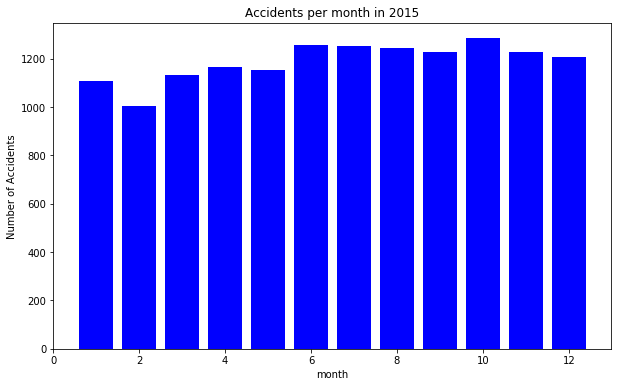

In [21]:
acc_2015_by('month')

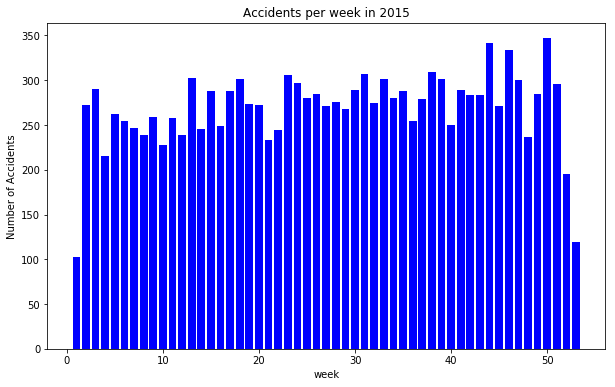

In [22]:
acc_2015_by('week')

In [25]:
acc_04_19 = acc[(acc['year'] > 2003) & (acc['year'] < 2019)]

#### We don't see a clear pattern here, except around new years (where there is also likely an artificial low, because the last/first week is split between years.). - A pattern could occur if we have the same peaks as here in every year.

In [26]:
def acc_by(unit):
    x = acc_04_19.groupby(unit).size().index
    y = acc_04_19.groupby(unit).size().values

    plt.figure(figsize=(10,6)) 
    plt.bar(x, y, color = 'b')
    plt.title('Accidents per {} 2004 - 2019'.format(unit))
    plt.xlabel(unit)
    plt.ylabel('Number of Accidents')

    plt.savefig('{}_count_04-19.png'.format(unit))

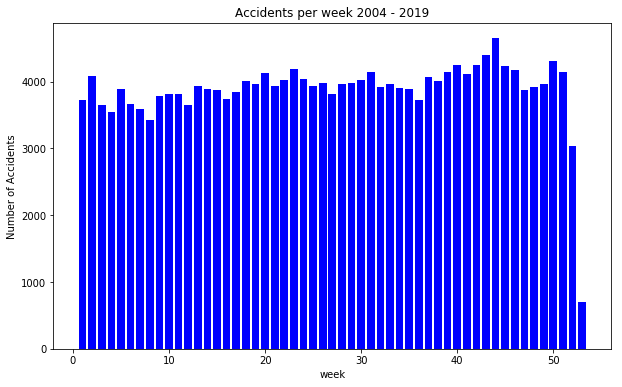

In [27]:
acc_by('week')